In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('reviews.csv', names=['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review', 'Review_Text'])

In [3]:
dataset.head()

,Game_ID,Num_Helpful,Num_Funny,Username,Num_Games_Owned,Num_Reviews_Written,Recommend,Hours_Played,Date_of_Review,Review_Text
0,871930,1,0,76561198069270036,377,2,1,12.5,"October 20, 2021",Amazing game for the right audience. I have ta...
1,871930,1,0,76561198943850380,14,6,1,36.1,"October 4, 2021",for old gamers like me out there this game wil...
2,871930,1,0,76561198043881846,138,2,1,3.9,"September 30, 2021","It's a bit difficult recommending this game, b..."
3,871930,0,0,FancyPhatPotato,103,55,1,5.6,"September 22, 2021",Addicting gameplay. A lot like the game Screep...
4,871930,0,0,76561198082634674,325,59,1,7.5,"September 17, 2021",Wanna feel retarded? Get this game. It's great.


In [4]:
dataset.columns

Index(['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned',
       'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review',
       'Review_Text'],
      dtype='object')

In [5]:
# clean up uneeded columns
dataset.drop(labels = ['Game_ID', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written'], axis=1, inplace=True)

In [6]:
dataset.head()

,Num_Helpful,Num_Funny,Recommend,Hours_Played,Date_of_Review,Review_Text
0,1,0,1,12.5,"October 20, 2021",Amazing game for the right audience. I have ta...
1,1,0,1,36.1,"October 4, 2021",for old gamers like me out there this game wil...
2,1,0,1,3.9,"September 30, 2021","It's a bit difficult recommending this game, b..."
3,0,0,1,5.6,"September 22, 2021",Addicting gameplay. A lot like the game Screep...
4,0,0,1,7.5,"September 17, 2021",Wanna feel retarded? Get this game. It's great.


In [7]:
print(dataset.dtypes)

Num_Helpful         int64
Num_Funny           int64
Recommend           int64
Hours_Played      float64
Date_of_Review     object
Review_Text        object
dtype: object


In [8]:
# organize the columns so it would be easier to sort the features vs the output
df = dataset[['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend']]
df.head(20)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend
0,"October 20, 2021",Amazing game for the right audience. I have ta...,1,0,12.5,1
1,"October 4, 2021",for old gamers like me out there this game wil...,1,0,36.1,1
2,"September 30, 2021","It's a bit difficult recommending this game, b...",1,0,3.9,1
3,"September 22, 2021",Addicting gameplay. A lot like the game Screep...,0,0,5.6,1
4,"September 17, 2021",Wanna feel retarded? Get this game. It's great.,0,0,7.5,1
5,"September 9, 2021",e,0,0,10.6,-1
6,"September 8, 2021",+ Pretty fun and engaging. I found myself thin...,0,0,10.9,1
7,"September 2, 2021","Game is fun and all, it teaches you the basics...",2,0,23.9,-1
8,"August 20, 2021",Its like a puzzle/strategy game in which you c...,0,0,24.2,1
9,"August 15, 2021","Easy to get into, even for people who have no ...",0,0,24.8,1


In [9]:
df.columns

Index(['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny',
       'Hours_Played', 'Recommend'],
      dtype='object')

# Convert date to datetime format

In [10]:
import datetime as dt

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_of_Review  464 non-null    object 
 1   Review_Text     464 non-null    object 
 2   Num_Helpful     464 non-null    int64  
 3   Num_Funny       464 non-null    int64  
 4   Hours_Played    464 non-null    float64
 5   Recommend       464 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 21.9+ KB


In [12]:
# change date to unix datetime
dates = pd.to_datetime(df['Date_of_Review'])

# calculate unix datetime starting from 01-01-1970
df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_3648/3723366679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch
0,"October 20, 2021",Amazing game for the right audience. I have ta...,1,0,12.5,1,1634688000
1,"October 4, 2021",for old gamers like me out there this game wil...,1,0,36.1,1,1633305600
2,"September 30, 2021","It's a bit difficult recommending this game, b...",1,0,3.9,1,1632960000
3,"September 22, 2021",Addicting gameplay. A lot like the game Screep...,0,0,5.6,1,1632268800
4,"September 17, 2021",Wanna feel retarded? Get this game. It's great.,0,0,7.5,1,1631836800


In [13]:
# change the epoch time from total number of seconds into week number since(take the Date_Epoch and mod (b/c we want integers only) by num_secs_week = 7day/wk * 24hr/day * 60min/hr * 60sec/min = 604800)

df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_3648/3335926905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 20, 2021",Amazing game for the right audience. I have ta...,1,0,12.5,1,1634688000,2702
1,"October 4, 2021",for old gamers like me out there this game wil...,1,0,36.1,1,1633305600,2700
2,"September 30, 2021","It's a bit difficult recommending this game, b...",1,0,3.9,1,1632960000,2700
3,"September 22, 2021",Addicting gameplay. A lot like the game Screep...,0,0,5.6,1,1632268800,2698
4,"September 17, 2021",Wanna feel retarded? Get this game. It's great.,0,0,7.5,1,1631836800,2698


In [14]:
df.sort_values(by=['Date_Epoch_Week'],ascending=True).groupby('Date_Epoch_Week')
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 20, 2021",Amazing game for the right audience. I have ta...,1,0,12.5,1,1634688000,2702
1,"October 4, 2021",for old gamers like me out there this game wil...,1,0,36.1,1,1633305600,2700
2,"September 30, 2021","It's a bit difficult recommending this game, b...",1,0,3.9,1,1632960000,2700
3,"September 22, 2021",Addicting gameplay. A lot like the game Screep...,0,0,5.6,1,1632268800,2698
4,"September 17, 2021",Wanna feel retarded? Get this game. It's great.,0,0,7.5,1,1631836800,2698


## - Data Aggregation -

### Number of text reviews per day:

In [15]:
# reindex gets the columns needed
df_text = df.reindex(['Date_Epoch_Week','Date_of_Review', 'Review_Text'], axis=1)
df_text.head()
# formats to year-month datetime format
# df_text['Year_Month'] = pd.to_datetime(df_text['Year_Month'], format="%Y/%m")

,Date_Epoch_Week,Date_of_Review,Review_Text
0,2702,"October 20, 2021",Amazing game for the right audience. I have ta...
1,2700,"October 4, 2021",for old gamers like me out there this game wil...
2,2700,"September 30, 2021","It's a bit difficult recommending this game, b..."
3,2698,"September 22, 2021",Addicting gameplay. A lot like the game Screep...
4,2698,"September 17, 2021",Wanna feel retarded? Get this game. It's great.


In [16]:

# groupby counts the total number of reviews per day
text_days = df_text.groupby(['Date_Epoch_Week', 'Date_of_Review']).size().reset_index().rename(columns={0: 'review_count'})
text_days

,Date_Epoch_Week,Date_of_Review,review_count
0,2536,"August 10, 2018",21
1,2536,"August 11, 2018",10
2,2536,"August 12, 2018",1
3,2536,"August 13, 2018",7
4,2536,"August 14, 2018",1
...,...,...,...
246,2698,"September 17, 2021",1
247,2698,"September 22, 2021",1
248,2700,"October 4, 2021",1
249,2700,"September 30, 2021",1


<AxesSubplot:>

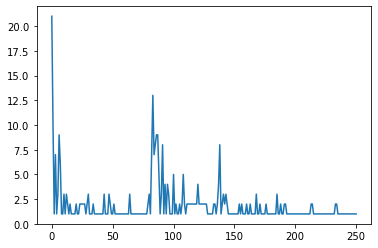

In [17]:
text_days['review_count'].plot()

In [18]:
# total number of text reviews
text_days['review_count'].sum()

464

In [19]:
# average number of text reviews per day
text_days['review_count'].mean()

1.848605577689243

### Number of text reviews per week:

In [20]:
df_text = df.reindex(['Date_Epoch_Week','Review_Text'], axis=1)
text_weeks = df_text.groupby('Date_Epoch_Week').size().reset_index().rename(columns={0: 'review_count'})
text_weeks

,Date_Epoch_Week,review_count
0,2536,52
1,2537,12
2,2538,8
3,2539,2
4,2540,5
...,...,...
112,2696,2
113,2697,1
114,2698,2
115,2700,2


<AxesSubplot:>

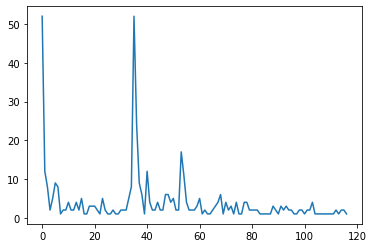

In [21]:
text_weeks['review_count'].plot()

In [22]:
# total number of text reviews
text_weeks['review_count'].sum()

464

In [23]:
# average number of text reviews per week
text_weeks['review_count'].mean()

3.965811965811966

### Num_Helpful per week:

In [24]:
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 20, 2021",Amazing game for the right audience. I have ta...,1,0,12.5,1,1634688000,2702
1,"October 4, 2021",for old gamers like me out there this game wil...,1,0,36.1,1,1633305600,2700
2,"September 30, 2021","It's a bit difficult recommending this game, b...",1,0,3.9,1,1632960000,2700
3,"September 22, 2021",Addicting gameplay. A lot like the game Screep...,0,0,5.6,1,1632268800,2698
4,"September 17, 2021",Wanna feel retarded? Get this game. It's great.,0,0,7.5,1,1631836800,2698


In [25]:
df_helpful = df.reindex(['Date_Epoch_Week', 'Num_Helpful'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.sum().reset_index().rename(columns={0: 'helpful_count'})


,Date_Epoch_Week,Num_Helpful
0,2536,122
1,2537,14
2,2538,4
3,2539,1
4,2540,5
...,...,...
112,2696,2
113,2697,0
114,2698,0
115,2700,2


In [26]:
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2536,17,0,1.0,2.346154
2537,6,0,0.5,1.166667
2538,3,0,0.0,0.500000
2539,1,0,0.5,0.500000
2540,4,0,0.0,1.000000
...,...,...,...,...
2696,2,0,1.0,1.000000
2697,0,0,0.0,0.000000
2698,0,0,0.0,0.000000


In [27]:
# total number of helpful votes of all users for all text reviews combined
df_helpful['Num_Helpful'].sum()

1223

In [28]:
# average number of helpful votes on all reviews by all users
df_helpful['Num_Helpful'].mean()

2.6357758620689653

### Num_Funny per week:

In [29]:
df_funny = df.reindex(['Date_Epoch_Week', 'Num_Funny'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_funny.groupby('Date_Epoch_Week').Num_Funny.sum().reset_index().rename(columns={0: 'funny_count'})

,Date_Epoch_Week,Num_Funny
0,2536,22
1,2537,7
2,2538,2
3,2539,0
4,2540,5
...,...,...
112,2696,0
113,2697,0
114,2698,0
115,2700,0


In [30]:
df_funny.groupby('Date_Epoch_Week').Num_Funny.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2536,9,0,0.0,0.423077
2537,3,0,0.0,0.583333
2538,2,0,0.0,0.250000
2539,0,0,0.0,0.000000
2540,5,0,0.0,1.000000
...,...,...,...,...
2696,0,0,0.0,0.000000
2697,0,0,0.0,0.000000
2698,0,0,0.0,0.000000


In [31]:
# total number of funny votes of all users for all text reviews combined
df_funny['Num_Funny'].sum()

177

In [32]:
# average number of funny votes on all reviews by all users
df_funny['Num_Funny'].mean()

0.38146551724137934

### Hours_Played per week:

In [33]:
df_hrs_plyd = df.reindex(['Date_Epoch_Week','Hours_Played'], axis=1)

# total num of hours played of the game for each month for all reviewers
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.sum().reset_index().rename(columns={0: 'hrs_pld_count'})

,Date_Epoch_Week,Hours_Played
0,2536,2522.6
1,2537,274.4
2,2538,391.3
3,2539,34.5
4,2540,363.9
...,...,...
112,2696,34.8
113,2697,10.6
114,2698,13.1
115,2700,40.0


In [34]:
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2536,778.2,0.2,13.75,48.511538
2537,85.9,0.2,12.55,22.866667
2538,214.2,6.1,28.75,48.912500
2539,26.9,7.6,17.25,17.250000
2540,219.0,1.9,14.40,72.780000
...,...,...,...,...
2696,23.9,10.9,17.40,17.400000
2697,10.6,10.6,10.60,10.600000
2698,7.5,5.6,6.55,6.550000


In [35]:
# total number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].sum()

19599.300000000003

In [36]:
# average number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].mean()

42.239870689655206

### Recommend per week:

In [37]:
df_recmd = df.reindex(['Date_Epoch_Week','Recommend'], axis=1)

# avgerage number of reviewers recommended(1) + not recommended(-1) the game after writing the review for each week
df_recmd.groupby('Date_Epoch_Week',).Recommend.mean().reset_index().rename(columns={0: 'recmd_count'})

,Date_Epoch_Week,Recommend
0,2536,0.884615
1,2537,0.833333
2,2538,1.000000
3,2539,1.000000
4,2540,1.000000
...,...,...
112,2696,0.000000
113,2697,-1.000000
114,2698,1.000000
115,2700,1.000000


In [38]:
df_recmd.groupby('Date_Epoch_Week').Recommend.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2536,1,-1,1.0,0.884615
2537,1,-1,1.0,0.833333
2538,1,1,1.0,1.000000
2539,1,1,1.0,1.000000
2540,1,1,1.0,1.000000
...,...,...,...,...
2696,1,-1,0.0,0.000000
2697,-1,-1,-1.0,-1.000000
2698,1,1,1.0,1.000000


In [39]:
# total number of users who recommend the game
df_recmd['Recommend'].sum()

382

In [40]:
# average score of recommend/not recommend by all users
df_recmd['Recommend'].mean()

0.8232758620689655

## Feature Scaling - Min-Max Normalization

In [41]:
df_min_max_scaled = df.copy()

In [42]:
df_min_max_scaled.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 20, 2021",Amazing game for the right audience. I have ta...,1,0,12.5,1,1634688000,2702
1,"October 4, 2021",for old gamers like me out there this game wil...,1,0,36.1,1,1633305600,2700
2,"September 30, 2021","It's a bit difficult recommending this game, b...",1,0,3.9,1,1632960000,2700
3,"September 22, 2021",Addicting gameplay. A lot like the game Screep...,0,0,5.6,1,1632268800,2698
4,"September 17, 2021",Wanna feel retarded? Get this game. It's great.,0,0,7.5,1,1631836800,2698


In [43]:
#df_min_max_scaled['Num_Helpful'] = (df_min_max_scaled['Num_Helpful'] - df_min_max_scaled['Num_Helpful'].min()) / (df_min_max_scaled['Num_Helpful'].max() - df_min_max_scaled['Num_Helpful'].min())
#df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Recommend'] = (df_min_max_scaled['Recommend'] - df_min_max_scaled['Recommend'].min()) / (df_min_max_scaled['Recommend'].max() - df_min_max_scaled['Recommend'].min()) 
df_min_max_scaled['Date_Epoch'] = (df_min_max_scaled['Date_Epoch'] - df_min_max_scaled['Date_Epoch'].min()) / (df_min_max_scaled['Date_Epoch'].max() - df_min_max_scaled['Date_Epoch'].min()) 
#df_min_max_scaled['Date_Epoch_Week'] = (df_min_max_scaled['Date_Epoch_Week'] - df_min_max_scaled['Date_Epoch_Week'].min()) / (df_min_max_scaled['Date_Epoch_Week'].max() - df_min_max_scaled['Date_Epoch_Week'].min()) 

display(df_min_max_scaled)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 20, 2021",Amazing game for the right audience. I have ta...,1,0,0.015936,1.0,1.000000,2702
1,"October 4, 2021",for old gamers like me out there this game wil...,1,0,0.046267,1.0,0.986301,2700
2,"September 30, 2021","It's a bit difficult recommending this game, b...",1,0,0.004884,1.0,0.982877,2700
3,"September 22, 2021",Addicting gameplay. A lot like the game Screep...,0,0,0.007069,1.0,0.976027,2698
4,"September 17, 2021",Wanna feel retarded? Get this game. It's great.,0,0,0.009510,1.0,0.971747,2698
...,...,...,...,...,...,...,...,...
459,"July 10, 2019","This is a very well made game, and I've had a ...",0,0,0.006554,1.0,0.286815,2583
460,"July 6, 2019","PLaying mobile version since 2k17, Gladiabots ...",0,0,0.007454,1.0,0.283390,2583
461,"July 3, 2019","This game is an intricate, but streamlined, pr...",8,0,0.027888,1.0,0.280822,2582
462,"July 2, 2019",Perfect game to train your logic,0,0,0.028274,1.0,0.279966,2582


In [44]:
df_sorted = df_min_max_scaled.sort_values(by='Date_Epoch', ascending=False)

In [45]:
pd.set_option('display.max_rows', None)

In [46]:
df_sorted = df_sorted.reset_index(drop=True)

In [47]:
# drop all n/a data
clean_df=df.drop(df[df['Review_Text'].isna()].index, inplace=True)
cat_df=df.drop(df[df['Recommend'].isna()].index, inplace=True)

C:\Users\anqiz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
# delete Chinese characters in text reviews
df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_3648/2491715762.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')


In [49]:
df_sorted

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 20, 2021",Amazing game for the right audience. I have ta...,1,0,0.015936,1.0,1.000000,2702
1,"October 4, 2021",for old gamers like me out there this game wil...,1,0,0.046267,1.0,0.986301,2700
2,"September 30, 2021","It's a bit difficult recommending this game, b...",1,0,0.004884,1.0,0.982877,2700
3,"September 22, 2021",Addicting gameplay. A lot like the game Screep...,0,0,0.007069,1.0,0.976027,2698
4,"September 17, 2021",Wanna feel retarded? Get this game. It's great.,0,0,0.009510,1.0,0.971747,2698
5,"September 9, 2021",e,0,0,0.013494,0.0,0.964897,2697
6,"September 8, 2021",+ Pretty fun and engaging. I found myself thin...,0,0,0.013880,1.0,0.964041,2696
7,"September 2, 2021","Game is fun and all, it teaches you the basics...",2,0,0.030587,0.0,0.958904,2696
8,"August 20, 2021",Its like a puzzle/strategy game in which you c...,0,0,0.030973,1.0,0.947774,2694
9,"August 15, 2021","Easy to get into, even for people who have no ...",0,0,0.031744,1.0,0.943493,2693


In [50]:
# sorted review text
df_text_list = df_sorted.groupby('Date_Epoch_Week')['Review_Text'].apply(list) # save separately as json file

In [51]:
df_text_list

Date_Epoch_Week
2536    [Very nice game. 4 bots, 4 classes, zero free ...
2537    [Solid design concept and solid execution., It...
2538    [A fantastic game if you are a seasoned progra...
2539    [Very nice!, +1Expect programming puzzles and ...
2540    [This is a very fun game if you are into compe...
2541    [Highly recommend to everyone, regardless of p...
2542    [This game is an incredible idea, its also ver...
2543    [Gladiabots gives you a little more than just ...
2544    [Cool concept for a game!Programming your bots...
2545    [fANtASTing, Neat game. UI could uses some hel...
2546    [This game is AMAZING!!! I'm complete garbage ...
2547    [I have been really enjoying this game, the be...
2548    [The goal is simple. Assemble a squad of bots,...
2549    [intelligent, ., its fun game, My goal for any...
2550    [Discovered this game during its Early Access....
2551    [Fun Game for everyone who likes games of logi...
2552                                             [Unique

In [52]:
# storing data in JSON format
df_text_list.to_json('gladiabots_text.json', orient = 'split', compression = 'infer')

In [53]:
# reading the JSON file
game_text = pd.read_json('gladiabots_text.json')
print(game_text)

            name  index                                               data
0    Review_Text   2536  [Very nice game. 4 bots, 4 classes, zero free ...
1    Review_Text   2537  [Solid design concept and solid execution., It...
2    Review_Text   2538  [A fantastic game if you are a seasoned progra...
3    Review_Text   2539  [Very nice!, +1Expect programming puzzles and ...
4    Review_Text   2540  [This is a very fun game if you are into compe...
5    Review_Text   2541  [Highly recommend to everyone, regardless of p...
6    Review_Text   2542  [This game is an incredible idea, its also ver...
7    Review_Text   2543  [Gladiabots gives you a little more than just ...
8    Review_Text   2544  [Cool concept for a game!Programming your bots...
9    Review_Text   2545  [fANtASTing, Neat game. UI could uses some hel...
10   Review_Text   2546  [This game is AMAZING!!! I'm complete garbage ...
11   Review_Text   2547  [I have been really enjoying this game, the be...
12   Review_Text   2548  

In [54]:
# mean of other columns; save as csv file
mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly
mean_per_week.to_csv('gladiabots_mean_week.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_3648/2119806801.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly


In [55]:
mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily
mean_day.to_csv('gladiabots_mean_day.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_3648/960507127.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily


In [56]:
# storing data in CSV format
game_review = df_sorted.to_csv('gladiabots_review.csv', columns=['Date_Epoch_Week', 'Review_Text'])